# Técnicas Exploratorias en el Análisis de Series de Tiempo

---
## Estructura de datos

**Datos de corte transversal**: son datos recopilados mediante la observación de muchos sujetos (como individuos, empresas o países) al mismo tiempo, o sin tener en cuenta las diferencias en el tiempo.

*   Ejemplo: las ventas durante el mes de enero de 2020 para cada una de las 20 sucursales de una empresa

**Series de tiempo**: es una sucesión de datos de un único sujeto (como un individuo, una empresa o un país) medidos en determinados momentos del tiempo y ordenados cronológicamente.
*   Ejemplo: una serie histórica de las ventas de una
empresa en frecuencia mensual desde enero 2015 a
diciembre 2019

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2008,388393,290179,260995,179962,141913,140516,202580,176712,183492,206220,229789,309273
2009,432572,304527,236281,215869,157826,139880,171158,160886,175767,211534,235677,317718
2010,441145,290121,190456,180555,170618,142796,195843,188316,196116,234495,255859,314317
2011,429789,305579,296141,231246,190575,171328,224604,197464,216102,250271,277075,347111
2012,490501,387115,300258,278427,218722,192208,261328,249743,241553,264854,299242,370328
2013,484503,350251,356288,252000,210616,197421,258355,252228,240671,290725,308510,374636
2014,490976,354125,333977,254063,228542,193004,270426,251258,244717,302173,312854,438276
2015,560655,432415,370776,313408,263887,284005,331061,294748,300488,360330,401287,565276
2016,730786,599445,510732,374190,320357,301805,440925,370845,403192,456322,474278,657823
2017,964027,709043,521123,469626,357953,322568,491167,480158,442503,481782,517243,692690


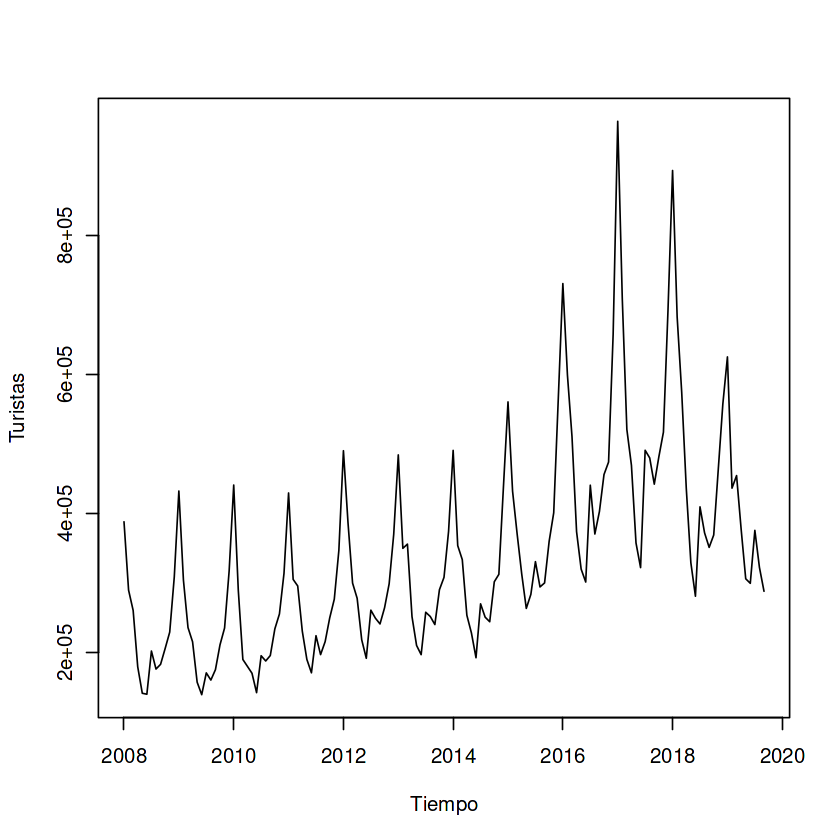

In [2]:
df_turismo <- read.csv("turismo.csv")
turistas <- ts(df_turismo[,1],frequency = 12, start = c(2008, 01))
turistas
plot(turistas, xlab="Tiempo",ylab="Turistas")

## Propósito del análisis de series de tiempo

*   Análisis y modelamiento explicativo: entender el pasado.
*   Pronóstico: predecir el futuro.
  *   Por ejemplo, para predecir demanda.
*   Base para simulaciones de computador:
    *   Por ejemplo, para evaluar el impacto de políticas o regulaciones.
*   Regresión de series de tiempo: los supuesto de mínimos cuadrados ordinarios son violados cuando la variable dependiente e independiente son series de tiempo.
*   Control de calidad y gestión óptima.
  *   Por ejemplo, gestión cuantitativa del riesgo en carteras de inversión.

---

## Elementos esenciales de una serie de tiempo

*   **Dependencia temporal o serial** 🕐
  *   Observaciones cercanas en el tiempo suelen estar correlacionadas.
*   **Tendencia.** 📈
  *   Se refiere al cambio en la media que presenta una serie de tiempo en el largo plazo.
*   **Efectos estacionales** ❄ 🌅
  *   Se refiere a la variación regular de acuerdo a una "temporada" o "estación". Puede ser mensual, anual, diaria, etc.
  *   Suelen ser periódicos y por tanto predecibles.
*   **Variación cíclica** 😖
  *   Oscilaciones de causa desconocida y periódo variable.

**Nuestro objetivo es desarrollar modelos estadísticos para explicar las características de una serie de tiempo**



## Notación básica

* Tiempo discreto: $t = 0, ±1, ±2$
* Modelo: $\{Y_t\}$
 * Aleatorio, función del tiempo .
 * Proceso estocástico o modelo de serie de tiempo
 * Podemos pensarlo como el "proceso generador de datos"
* Data: $\{y_1, \dots, y_n\}$
 * Series de tiempo históricas.
 * Realización de una sequencia de variables aleatorias.

## Descomposición de una serie de tiempo 

Formalmente, la descomposición de una serie se representa como:

$$ Y_t = f(S_t, M_t, E_t) $$

Donde $Y_t$ es la serie de tiempo de interés observada en la fecha $t$, $S_t$ es el componente estacional, $M_t$ es el componente tendencia-ciclo y $E_t$ es el componente residual

* Si se asume una forma aditiva, entonces $Y_t = S_t + M_t + E_t$
* Si se asume una forma multiplicativa, entonces $Y_t = S_t \times M_t \times E_t$
* Si se asume un efecto estacional multiplicativo con error aditivo, entonces $Y_t = S_t M_t + E_t$

Por lo general, asumimos que $E_t = Z_t$ donde $Z_t$ es un error de ruido blanco: $Z_t \sim \mathcal{N}(0, \sigma^2)$.
Más adelante veremos que los modelos de series de tiempo involucran un proceso de ruido blanco como el elemento base de su construcción.

Simulemos estos modelos! 🤓

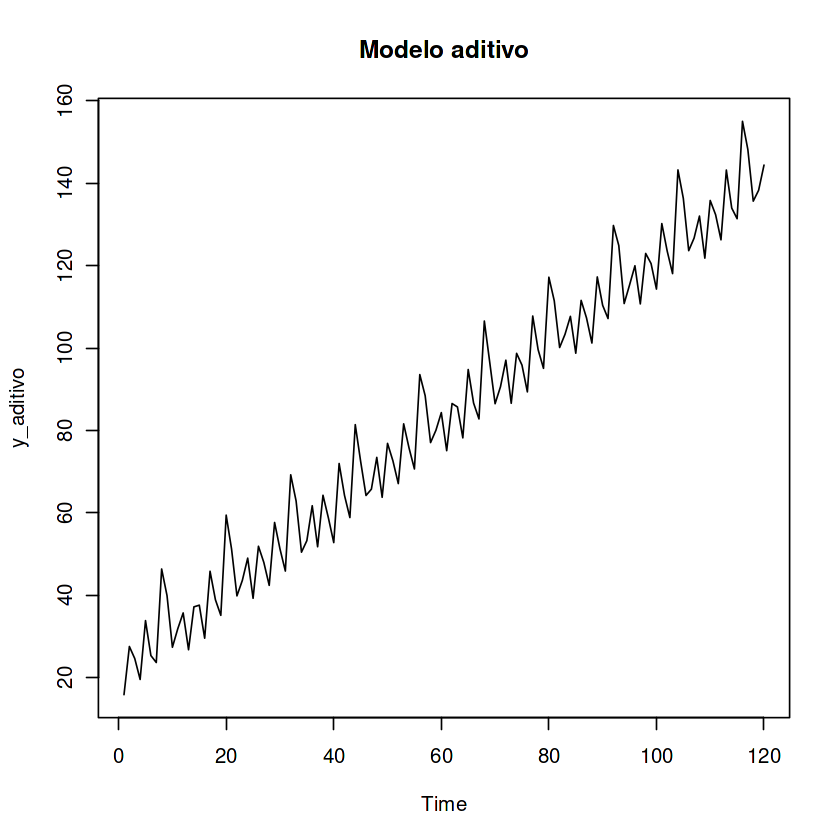

In [3]:
set.seed(2049)
t <- 120
m <- 30+1:t
s <- rep(rnorm(12, sd = 10), 10)
e <- rnorm(t)
y_aditivo <- s + m + e
y_aditivo <- ts(y_aditivo)
plot(y_aditivo, main = "Modelo aditivo")

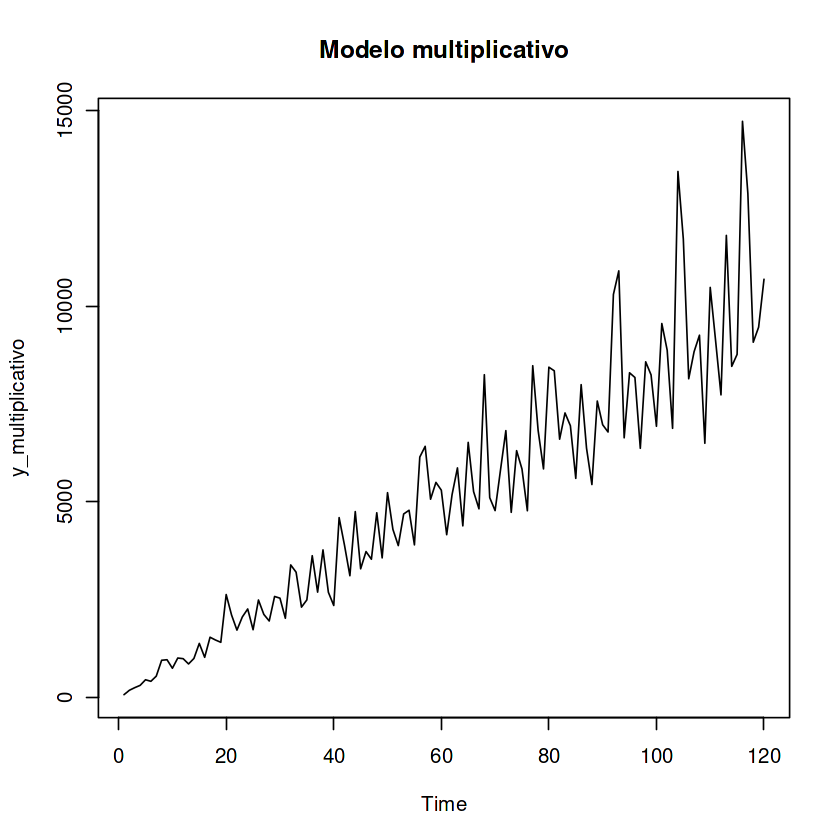

In [4]:
set.seed(2049)
t <- 12*10
m <- 1:t
s <- rep(rnorm(12, mean = 10, sd = 2), t/12)
e <- rnorm(t, mean = 10)
y_multiplicativo <- s*m*e
y_multiplicativo <- ts(y_multiplicativo)
plot(y_multiplicativo, main = "Modelo multiplicativo")

Cuando $Y_t$ es positivo en el contexto de un modelo multiplicativo, se puede transformar la descomposición multiplicativa y recuperar una aditiva aplicando logaritmos:

$$Y_t = S_t \times M_t \times E_t$$
$$\log(Y_t)= \log(S_t) + \log(M_t )+ \log(E_t)$$

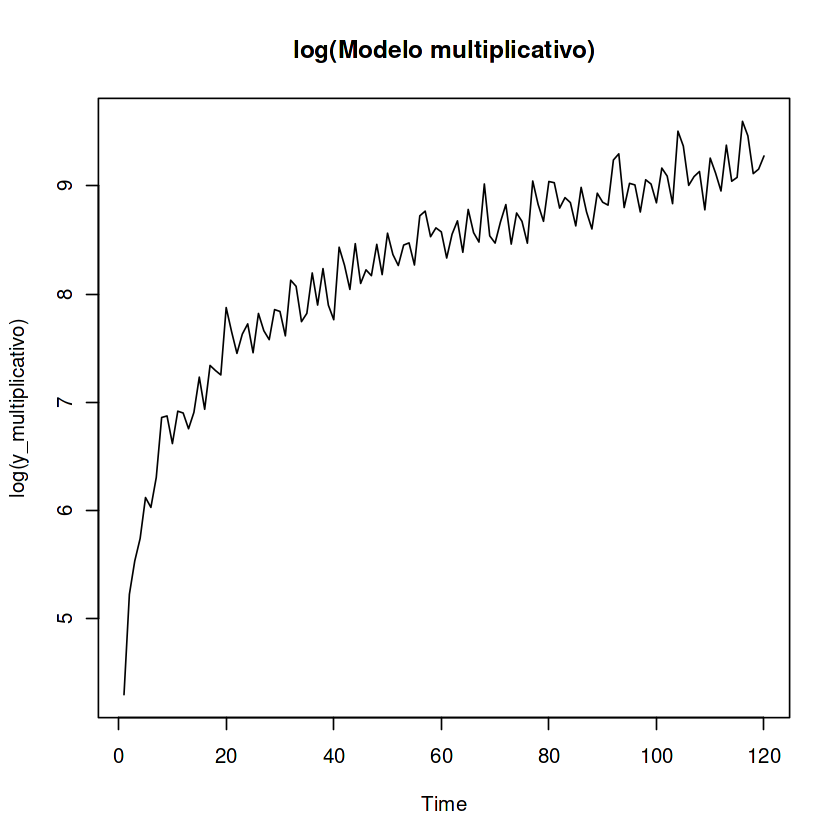

In [5]:
plot(log(y_multiplicativo), main = "log(Modelo multiplicativo)")

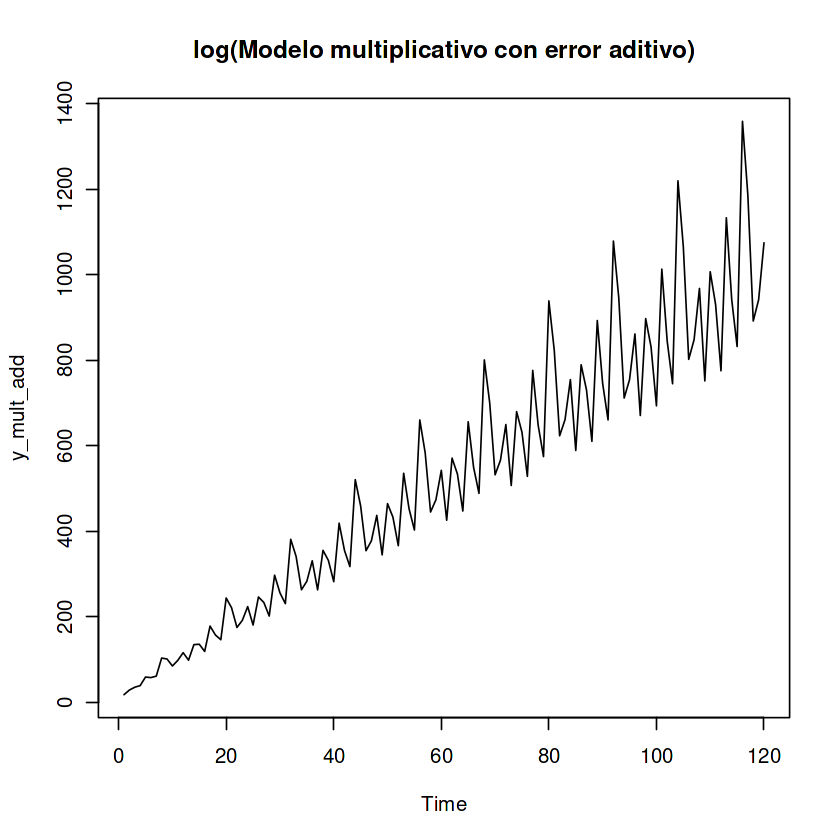

In [6]:
set.seed(2049)
t <- 12*10
m <- 1:t
s <- rep(rnorm(12, mean = 10, sd = 2), t/12)
e <- rnorm(t, mean = 10)
y_mult_add <- s*m + e
y_mult_add <- ts(y_mult_add)
plot(y_mult_add, main = "log(Modelo multiplicativo con error aditivo)")

## ¿Por qué es relevante identificar la estacionalidad de una serie?

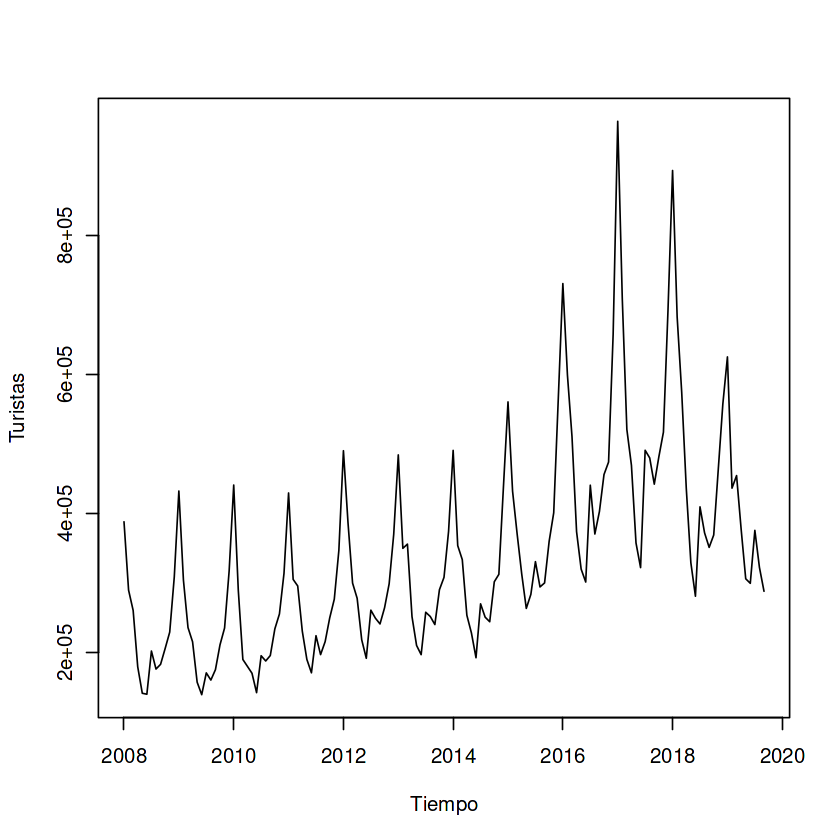

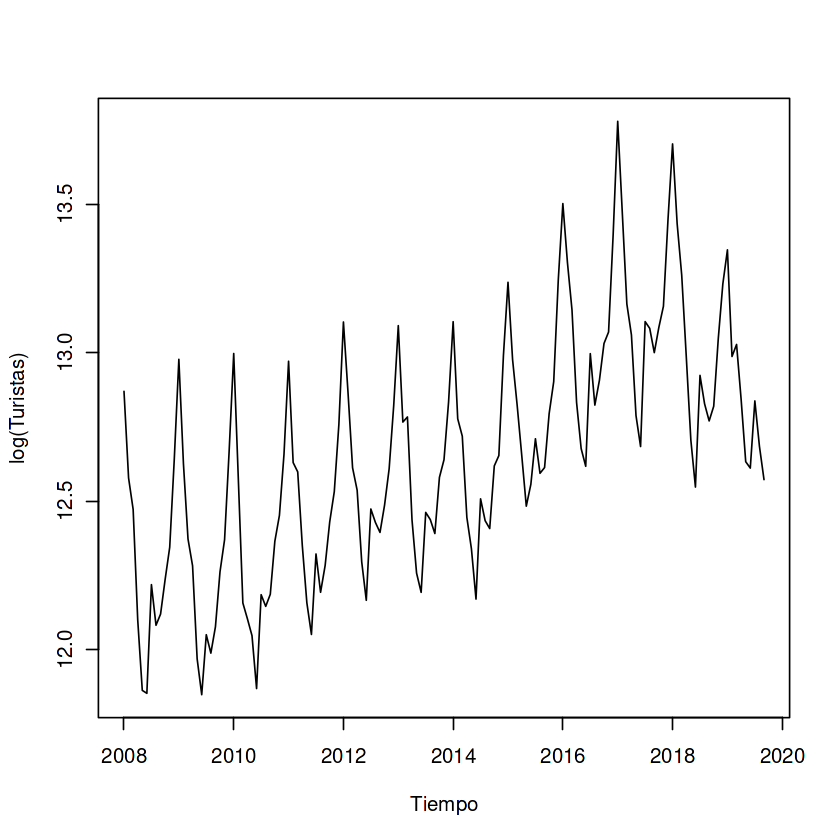

In [7]:
plot(turistas, xlab="Tiempo",ylab="Turistas")
plot(log(turistas), xlab="Tiempo",ylab="log(Turistas)")

Entender el tipo de estacionalidad de la serie es relevante para capturar mejor su tendencia y estacionalidad.

## Suavización de series de tiempo

Una serie de tiempo **suavizada** puede ser obtenida a partir de la serie original $\{y_t\}$ a través de:

$$ \hat{y}_t := \sum_{r = -q}^{s} \omega_r y_{t+r} $$

donde $\{\omega_r\}$ son **pesos** o **ponderadores** que usualmente suman a $1$: $\sum_{r = -q}^{s} \omega_r = 1$ 

La suavización puede ser usada

* Identificar y estimar la tendencia por medio de la reducción de la variación local
* Eliminar el efecto estacional

In [8]:
library(TTR)

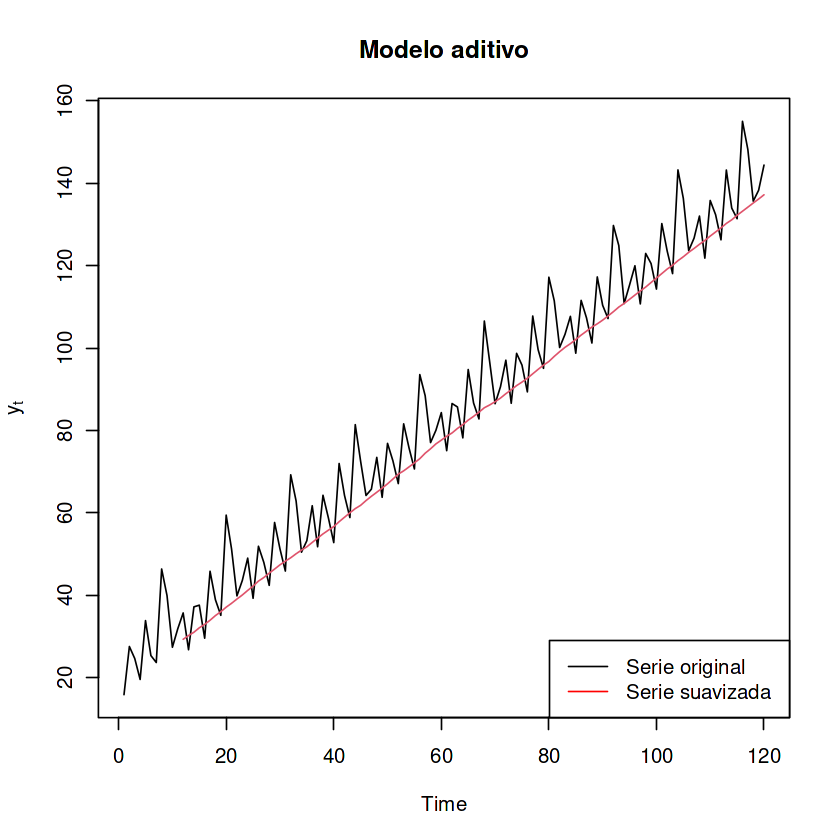

In [9]:
y_trend <- SMA(y_aditivo, n = 12)
plot(y_aditivo, main = "Modelo aditivo", ylab = expression(y[t]))
lines(y_trend, col = 2)
legend(x = "bottomright", 
       legend = c("Serie original", "Serie suavizada"), 
       lty = c(1,1),
       col = c("black", "red"))

## Métodos simples de suavización de series de tiempo

Dada una serie de tiempo $y_1, y_2, y_3, \dots y_T$, tenemos lo siguiente

* Media móvil simple de $M$ valores previos (comando `SMA()`):
$$\hat{y}_{T+1} = \frac{y_T + y_{T-1} + \dots + y_{T-(M-1)}}{M}$$
$$\hat{y}_{T+2} = \hat{y}_{T+1} + \frac{1}{M}[y_{T+1} - y_{T-(M-1)}]$$

* Suvización exponencial simple (`ses()`):
$$\hat{y}_{T+s} = \hat{y}_{T+(s-1)} + \alpha(y_{T+(s-1)} -  \hat{y}_{T+(s-1)} )$$

In [10]:
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



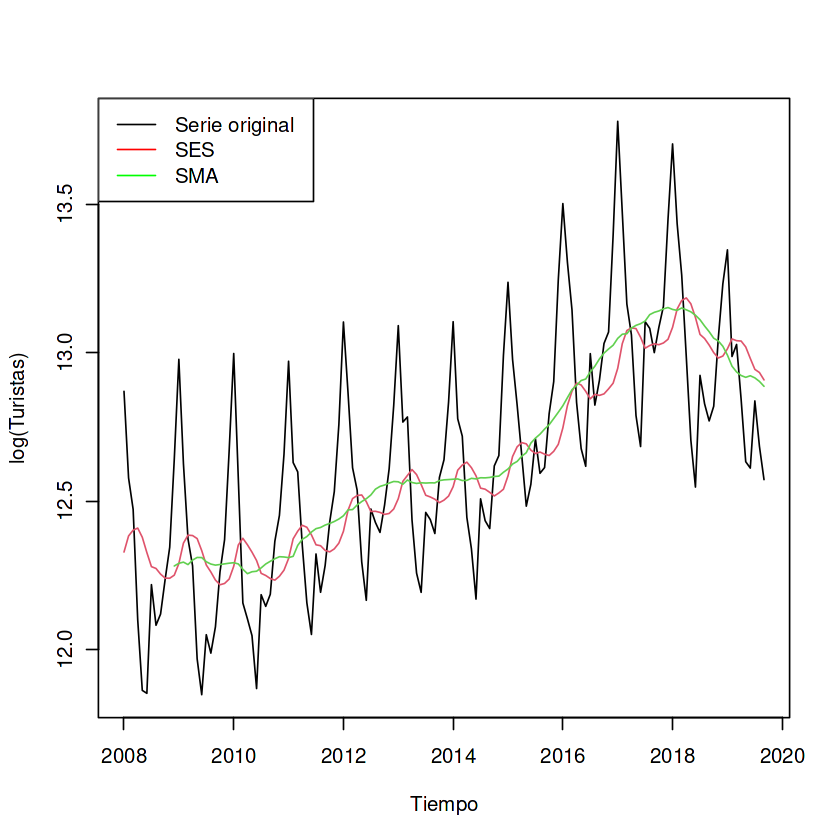

In [12]:
log_turistas <- log(turistas)
plot(log_turistas, xlab="Tiempo",ylab="log(Turistas)")
ses_model <- ses(log_turistas, alpha = 0.1)
sma_model <- SMA(log_turistas, n = 12)
lines(ses_model$fitted, col = 2)
lines(sma_model, col = 3)
legend(x = "topleft", 
       legend = c("Serie original", "SES", "SMA"), 
       lty = c(1,1,1),
       col = c("black", "red", "green"))

* La suavización de series de tiempo nos entrega una estimacion de la tendencia de la serie $\hat{m}_t$
* Dado esto, el efecto estacional aditiva para el periodo $t$ puede ser estimado como $\hat{s}_t = y_t - \hat{m}_t$
* Al promediar estas estimaciones para cada periodo (e.g. meses, trimestres) nos da estimaciones de los efectos estacionales: $\hat{S}_j, (j = 1, \dots p)$.
* Luego $x_t - \hat{S}_j$ para el indice $t$ nos entrega la serie desestacionalizada (bajo el supuesto del modelo aditivo).
* Bajo el modelo multiplicativo, reemplazamos la substraccion por la division.

Finalmente, un metodo mas sofisticado para descomponer una serie de tiempo es el **loess smoothing**, i.e. locally weighted regression.

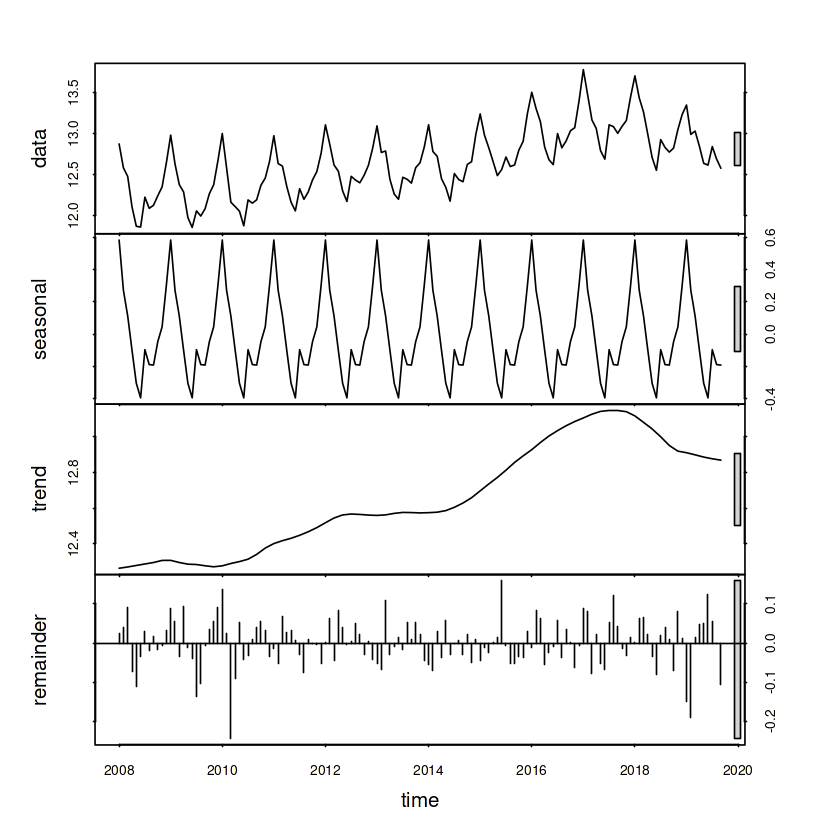

In [13]:
plot(stl(log_turistas, "period"))

## Evaluando la dependencia temporal

* La dependencia temporal es una característica esencial de los datos de series de tiempo
* Nuestro objetivo es derival modelos con una propiedades de dependencia serial similares a aquellas observadas en los datos
* **Cuál es una medida común de dependencia entre dos variables?**

* Dadas las observaciones pareadas $(x_1, y_1), \dots, (x_n, y_n)$
* El coeficiente de correlación muestral está definido como 

$$ r:= \frac{ \sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})  }{ \sqrt{\sum_{i=1}^n(x_i - \bar{x})^2}  \sqrt{\sum_{i=1}^n(y_i - \bar{y})^2 }} $$

* Recordemos que $-1 \leq r \leq 1$ y que $r$ es una medida del nivel de asociación lineal entre ambas variables.

* Para una serie de tiempo es natural mirar la correlación entre valores **consecutivos**:

$$(y_1, y_2), (y_2, y_3), \dots , (y_{n-1}, y_n)$$

* El coeficiente de correlación entre valores de la serie con un 1 **regazo** de distancia, también conocido como el **coeficiente de autocorrelación en lag 1** está dado

$$ r_1 := \frac{ \sum_{t=1}^{n-1}(y_t - \bar{y})(y_{t+1} - \bar{y})  }{ \sum_{t=1}^n(y_t - \bar{y})^2} $$

* Similarmente, el **coeficiente de autocorrelación en lag $h$** es

$$ r_h := \frac{ \sum_{t=1}^{n-h}(y_t - \bar{y})(y_{t+h} - \bar{y})  }{ \sum_{t=1}^n(y_t - \bar{y})^2} \ \ (h = 1, 2, \dots n-1)$$

* Cuando vemos $r_h$ como una función del lag $h$ este constituye la **función de autocorrelación (acf)**.

,Qtr1,Qtr2,Qtr3,Qtr4
2004,-9.1,0.2,9.2,0.3
2005,-9.6,0.7,8.3,0.3
2006,-7.8,-1.5,8.2,-2.3
2007,-7.3,-0.4,8.0,0.3


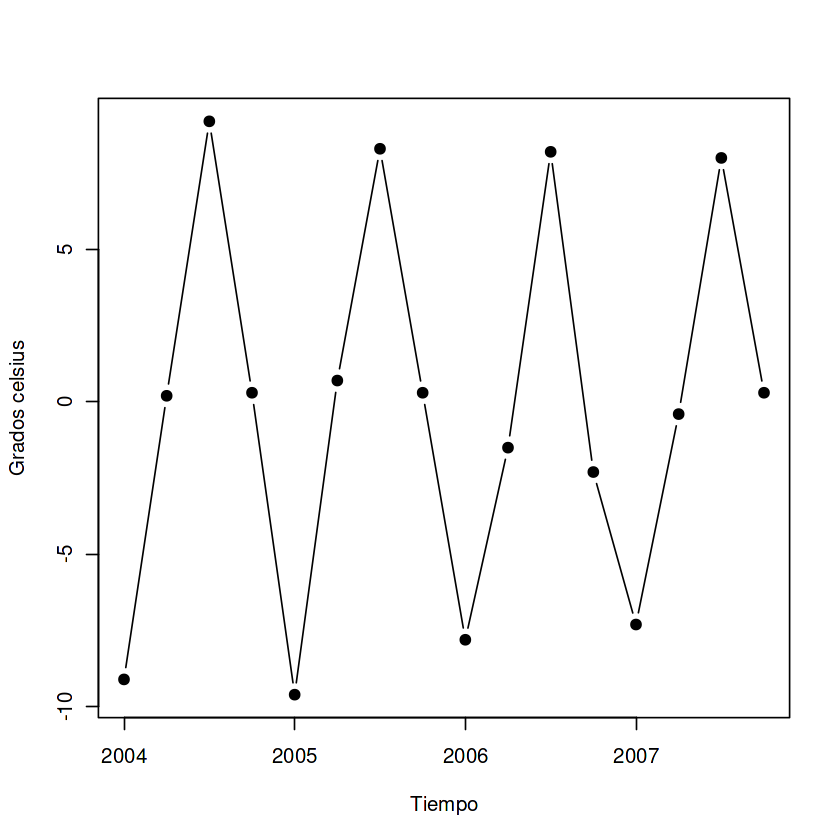

In [14]:
df_temp <- read.csv("prince_george_min_temp.csv")
temp <- ts(df_temp[,1],frequency = 4, start = c(2004, 01))
temp
plot(temp, xlab="Tiempo",ylab="Grados celsius", type = "b", pch = 19)

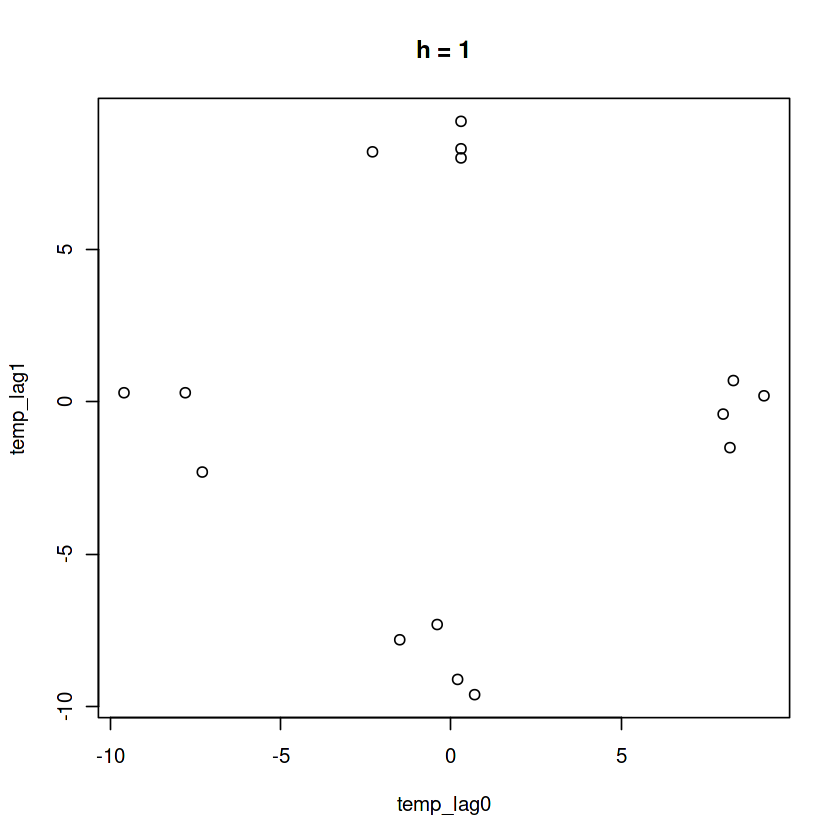

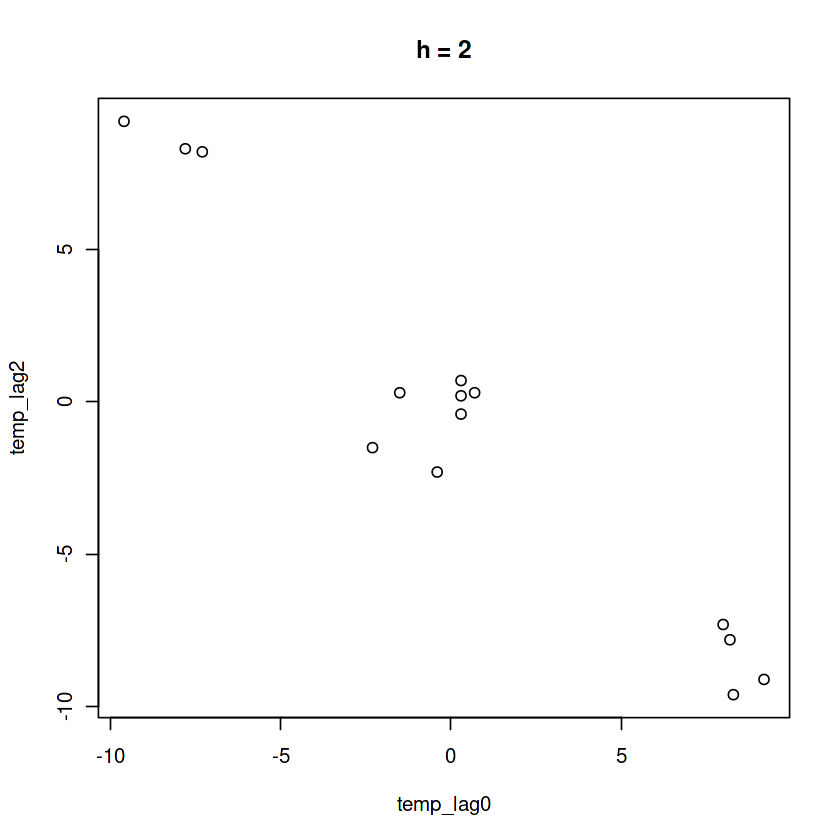

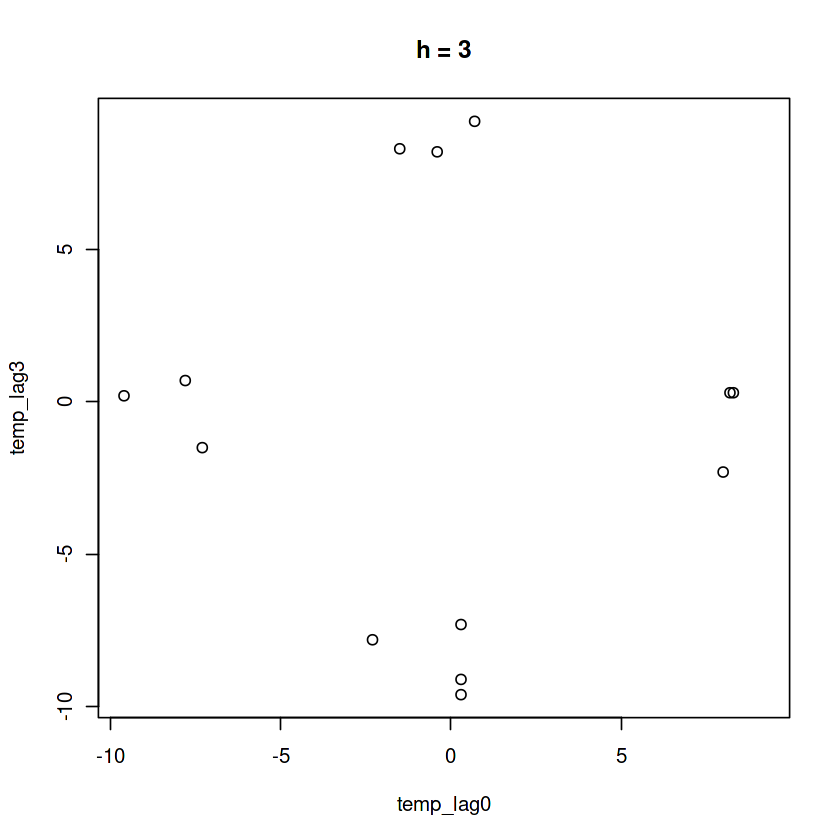

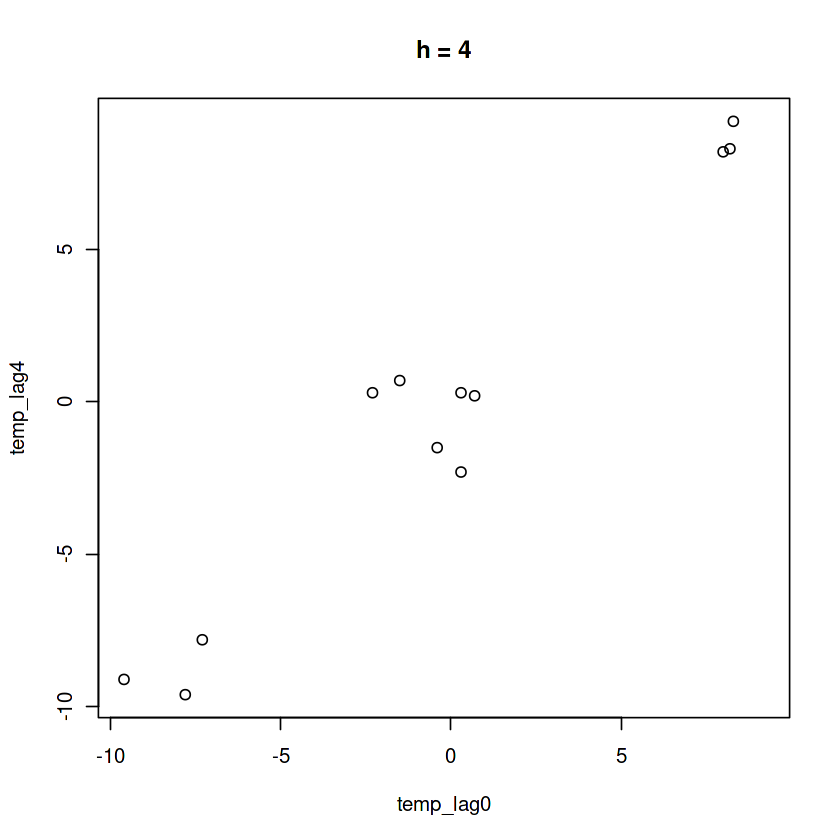

In [15]:
temp_lag0 <- as.numeric(temp)
temp_lag1 <- dplyr::lag(temp_lag0, n = 1)
temp_lag2 <- dplyr::lag(temp_lag0, n = 2)
temp_lag3 <- dplyr::lag(temp_lag0, n = 3)
temp_lag4 <- dplyr::lag(temp_lag0, n = 4)
plot(temp_lag0, temp_lag1, main = "h = 1")
plot(temp_lag0, temp_lag2, main = "h = 2")
plot(temp_lag0, temp_lag3, main = "h = 3")
plot(temp_lag0, temp_lag4, main = "h = 4")

## El correlograma

* El correlgrama es el grafico del acf $r_h$ contra el lag $h$.
* Es una herramienta grafica util para examinar la dependencia serial en el tiempo.
* Para una secuencia de $n$ observaciones independientes con la misma distribucion, i.e., una serie completamente aleatoria, tenemos que
$$r_h \sim \mathcal{N}(-1/n, 1/n), \ h\neq 0 $$
para un $n$ lo suficientemente grande.
* Podemos utilizar este hecho para construir intervalos de confianza para detectar autocorrelaciones significativas.
* Nota: Para una serie aleatoria, aproximadamente 1 en 20 valores de $r_h$ deberian estar fuera del intervalo $(-1/n \pm 2/\sqrt{n})$

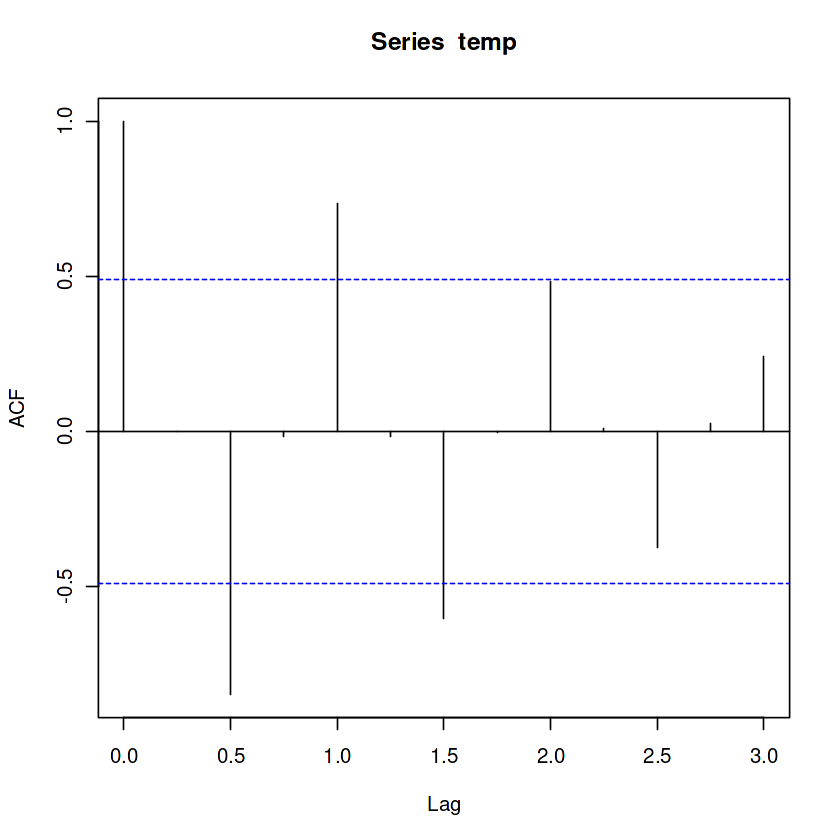

In [16]:
acf(temp)

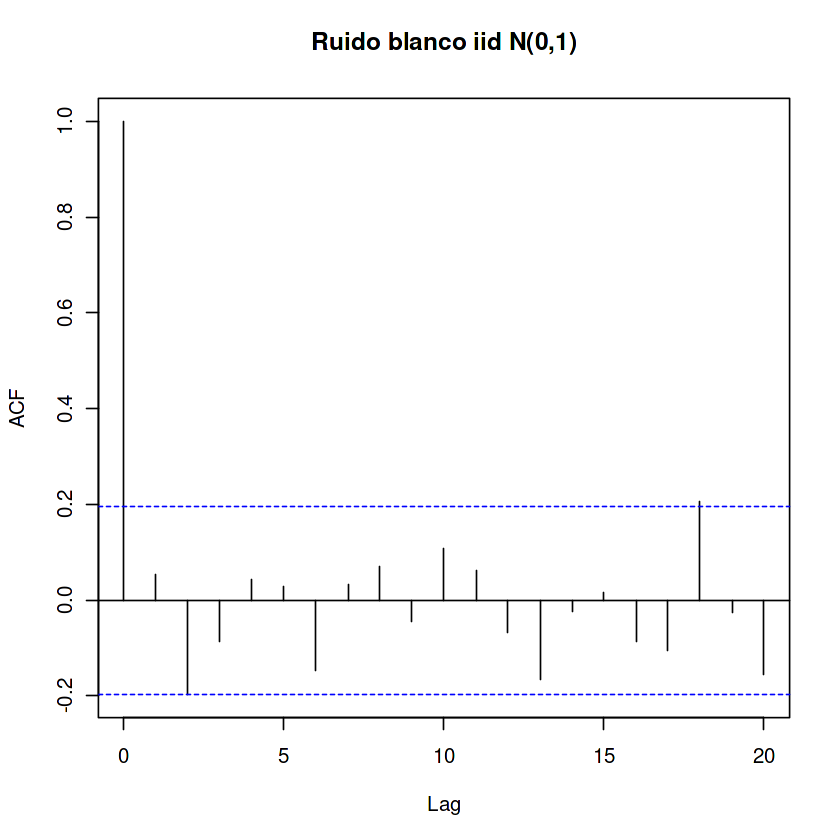

In [17]:
z <- rnorm(100)
acf(z, main = "Ruido blanco iid N(0,1)")

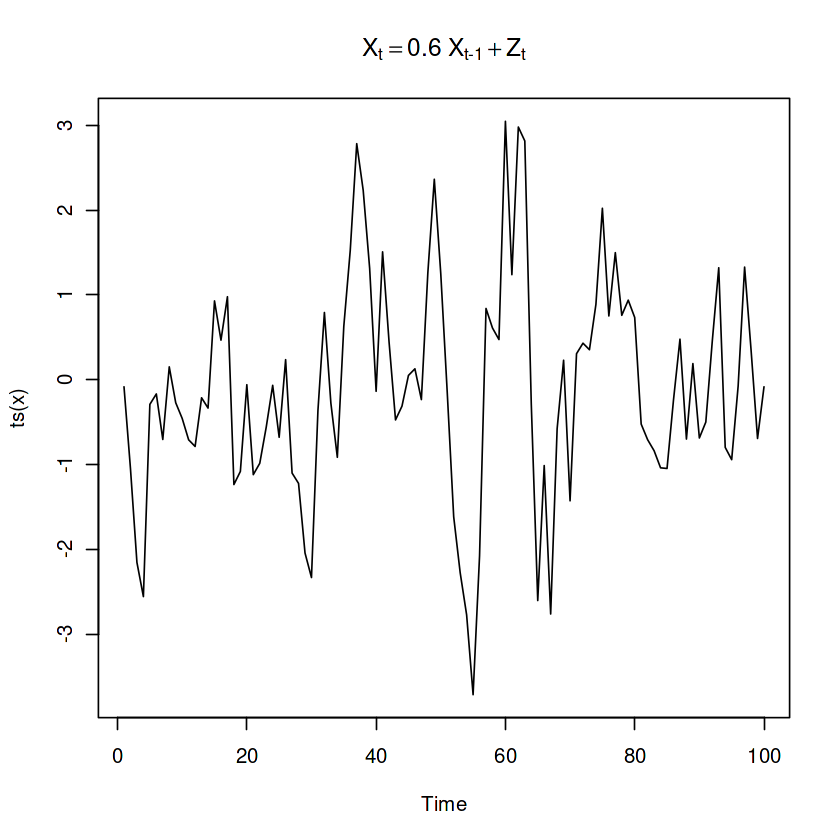

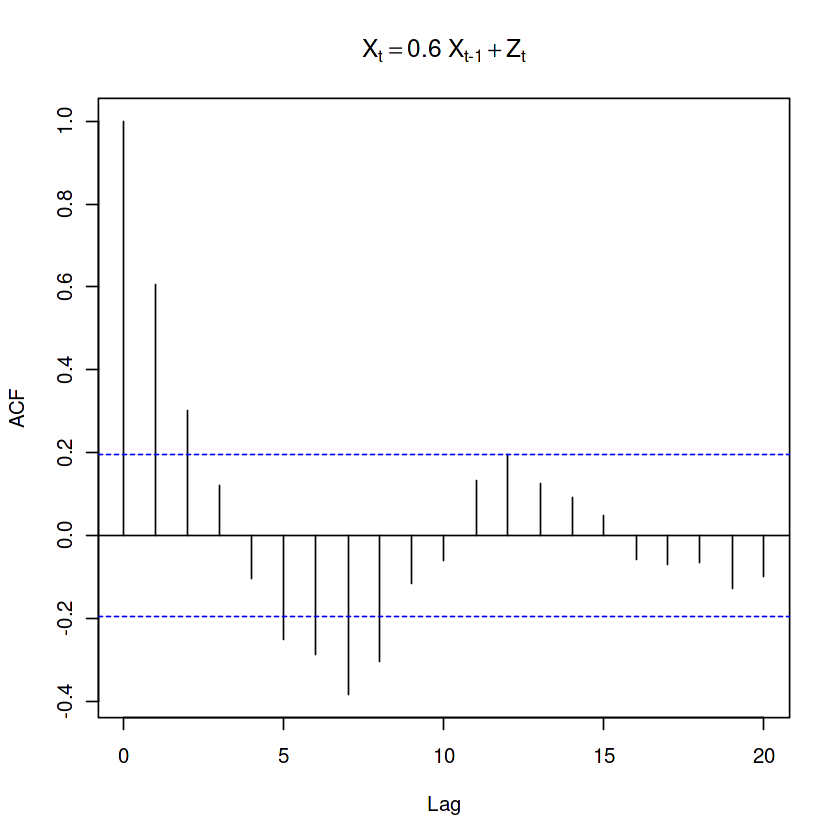

In [18]:
z <- rnorm(100)
x <- rep(rnorm(1), 100)

for (i in 2:100){
    x[i] <- 0.6*x[i-1] + z[i]
}

plot(ts(x), main = bquote(X[t] == .(0.6) ~ X["t-1"] + Z[t]))
acf(ts(x), main = bquote(X[t] == .(0.6) ~ X["t-1"] + Z[t]))

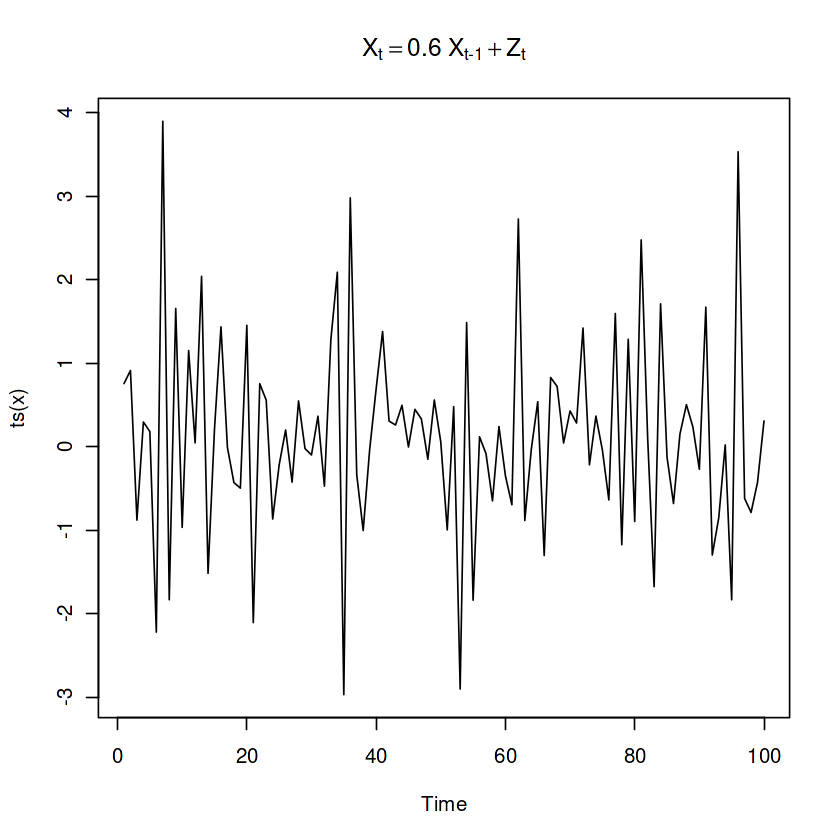

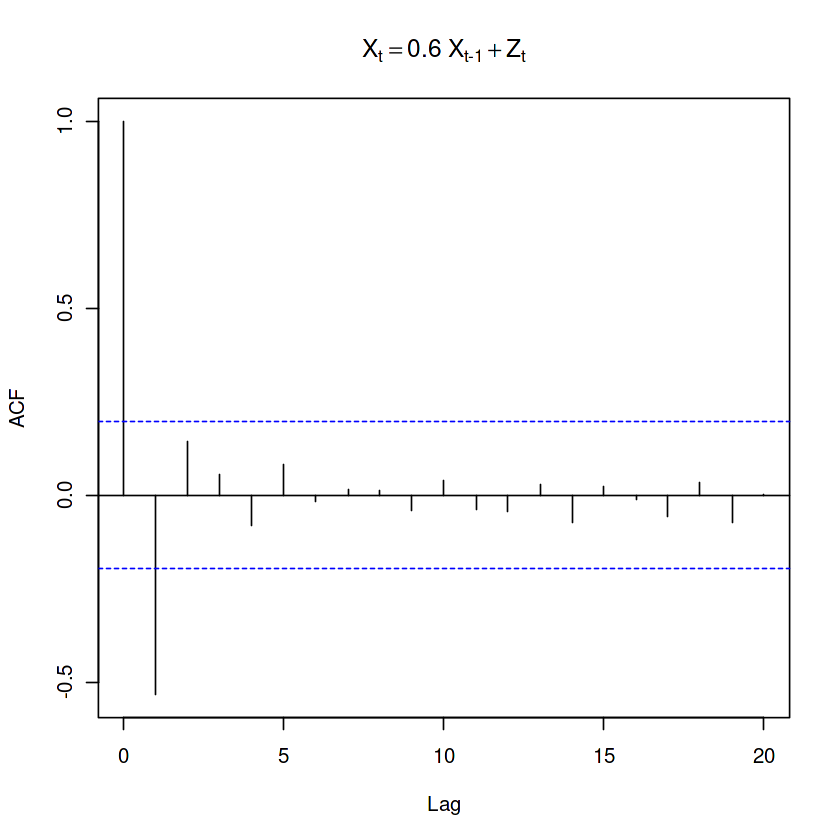

In [19]:
z <- rnorm(100)
x <- rep(rnorm(1), 100)

for (i in 2:100){
    x[i] <- -0.6*x[i-1] + z[i]
}

plot(ts(x), main = bquote(X[t] == .(0.6) ~ X["t-1"] + Z[t]))
acf(ts(x), main = bquote(X[t] == .(0.6) ~ X["t-1"] + Z[t]))

A continuacion, un pequeño resumen de casos especiales:

1. Ruido blanco IID: el acf suele estar en el intervalo $\pm2/\sqrt{n}$
2. Para muchas series estacionarias, el acf muestral suele decaer con el lag (mientras mas separadas las observaciones, menos correlacionadas estan).
3. Si la serie alterna, tambien alterna el acf. El valor de $r_1$ seria positivo mientras que el de $r_2$ seria negativo.
4. Si la serie tiene fluctuaciones estacionales o ciclicas, el acf va a oscilar a la misma frecuencia que estos efectos. Por ejemplo, para datos trimestrales, esperamos que $r_4$ sea grande y positivo.
5. Si la serie tiene una tendencia, el acf tendra un decaimiento muy lento puesto que habra un gran nivel de correlacion entre valores consecutivos.
	*  Dado esto, el acf es solo informativo para series de tiempo estacionarias (no confundir con estacionales)!